# MovieLens Recommendation System
## Personalized Movie Recommendations Using Collaborative Filtering

**Team:** Pandas and Chill  (GROUP 2)
**Date:** February 2026  
**Phase 4 Project - Advanced Machine Learning**





## Project Overview

This notebook presents a complete recommendation system using collaborative filtering on the MovieLens dataset. We analyze 100,836 ratings from 610 users across 9,724 movies to build a personalized top-5 movie recommendation engine for CineStream, a streaming platform.

**Key Objectives:**
1. Reduce 25% user churn through personalized recommendations
2. Decrease browsing time from 20+ minutes to under 5 minutes
3. Increase user engagement and monthly watch time by 30%



**Business Understanding**

Movie streaming platforms rely heavily on personalized recommendations to keep users engaged and satisfied. With thousands of movies available, users can easily feel overwhelmed by choice, which may reduce engagement and retention. A recommendation system helps surface relevant content to users based on their past behavior, improving user experience and increasing time spent on the platform.

**Stakeholder**

The primary stakeholders are:

-Product managers at a movie streaming platform who want to improve user engagement

-Marketing and content teams who want insights into user preferences

-End users, who benefit from personalized and relevant movie suggestions

**Business Problem**

The business problem addressed in this project is how to provide personalized movie recommendations to users based on their historical ratings. Specifically, the goal is to build a system that can generate top-5 movie recommendations for a user using patterns learned from other users with similar preferences.

**Why Recommendation Systems**

Recommendation systems are essential for personalization in modern digital platforms. Unlike traditional predictive models, recommendation systems focus on learning relationships between users and items rather than predicting a single outcome. This project uses collaborative filtering, which leverages similarities between users or movies to make recommendations, making it well suited for platforms with rich user–item interaction data like movie ratings.

**Why It Matters**

An effective recommendation system can:

- Increase user satisfaction by reducing search effort

- Improve user retention and platform engagement

- Drive business value through increased content consumption

From a data science perspective, recommendation systems represent an advanced supervised modeling approach that goes beyond standard classification and regression tasks.

**Dataset Choice**

This project uses the MovieLens “small” dataset (ml-latest-small) from the GroupLens Research Lab at the University of Minnesota. The dataset contains:

100,000 user ratings

~600 users

~9,000 movies

The dataset is widely used in academic research and provides explicit ratings, making it suitable for building, evaluating, and validating recommendation models while remaining manageable on a local machine.

**Modeling Approach**

The primary modeling approach is collaborative filtering, where recommendations are generated based on similarities between users and their movie ratings. Ratings are treated as a regression problem, and model performance is evaluated using metrics such as RMSE or MAE. If time permits, the project may also explore a hybrid approach by incorporating movie metadata (such as genres) to help address the cold-start problem for new users or movies.

## 2. Data Understanding & Initial Exploration

## Environment Setup and Library Installation

We begin by installing and importing all necessary libraries for our analysis.

**Libraries Used:**
- **pandas & numpy**: Data manipulation and numerical operations
- **matplotlib & seaborn**: Data visualization
- **scikit-learn**: Machine learning tools (cosine similarity, metrics, train-test split)
- **wordcloud**: Text visualization for movie titles and genres

**Why These Libraries?**
- scikit-learn provides the cosine similarity function for collaborative filtering (satisfies Phase 4 requirement to use packages beyond basic pandas)
- These are industry-standard tools for recommendation systems



In [3]:
# Install Surprise library (specialized for recommendation systems)
!pip install scikit-surprise

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print(' Libraries imported successfully!')

 Libraries imported successfully!


##  2.2: Data Acquisition

We download the MovieLens Small dataset directly from GroupLens Research Lab.

**Dataset Details:**
- **Source**: GroupLens Research Lab, University of Minnesota
- **Size**: 100,836 ratings
- **Users**: 610 unique users
- **Movies**: 9,724 unique movies
- **Rating Scale**: 0.5 to 5.0 stars (half-star increments)
- **Time Period**: March 1996 - September 2018

**Why This Dataset?**
- Industry-standard benchmark for recommendation systems
- Explicit ratings provide clear feedback signal
- Realistic sparsity (98.3%) reflects real-world scenarios
- Appropriate size for local computation without cloud infrastructure



In [4]:
# Download MovieLens Small dataset
!wget https://files.grouplens.org/datasets/movielens/ml-latest-small.zip
!unzip -q ml-latest-small.zip

print(' Dataset downloaded and extracted!')

--2026-02-04 13:43:42--  https://files.grouplens.org/datasets/movielens/ml-latest-small.zip
Resolving files.grouplens.org (files.grouplens.org)... 128.101.96.204
Connecting to files.grouplens.org (files.grouplens.org)|128.101.96.204|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 978202 (955K) [application/zip]
Saving to: ‘ml-latest-small.zip.1’

ml-latest-small.zip 100%[===================>] 955.28K   669KB/s    in 1.4s    

2026-02-04 13:43:44 (669 KB/s) - ‘ml-latest-small.zip.1’ saved [978202/978202]

/bin/bash: unzip: command not found
 Dataset downloaded and extracted!


##  2.3: Data Loading and Initial Inspection

Now we load the three main data files and examine their structure.

**Files in the Dataset:**
1. **ratings.csv**: User-movie-rating triplets with timestamps
2. **movies.csv**: Movie metadata (titles and genres)
3. **tags.csv**: User-generated tags for movies (optional for analysis)

**What We're Looking For:**
- Data types and structure
- Missing values
- Basic statistics
- Relationships between files



In [5]:
# Load datasets
ratings = pd.read_csv('ml-latest-small/ratings.csv')
movies = pd.read_csv('ml-latest-small/movies.csv')
tags = pd.read_csv('ml-latest-small/tags.csv')

print(' Data loaded successfully!\n')
print(f'Ratings shape: {ratings.shape}')
print(f'Movies shape: {movies.shape}')
print(f'Tags shape: {tags.shape}')

FileNotFoundError: [Errno 2] No such file or directory: 'ml-latest-small/ratings.csv'

In [ ]:
# Display first few rows of each dataset
print('RATINGS DATA:')
display(ratings.head())

print('\nMOVIES DATA:')
display(movies.head())

print('\nTAGS DATA:')
display(tags.head())

RATINGS DATA:


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931



MOVIES DATA:


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy



TAGS DATA:


,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


##  3: Data Quality Assessment

Before building models, we must understand our data quality and characteristics.

**Key Questions:**
1. Are there missing values?
2. Are there duplicate entries?
3. What is the distribution of ratings?
4. How sparse is the user-item matrix?

**Why This Matters:**
- Missing values can break our models
- Duplicates skew statistics
- Understanding sparsity informs our modeling approach
- Rating distribution reveals user behavior patterns



In [ ]:
# Data types and info
print('RATINGS INFO:')
print(ratings.info())
print('\n' + '='*50 + '\n')

print('MOVIES INFO:')
print(movies.info())

RATINGS INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB
None


MOVIES INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB
None


In [ ]:
# Statistical summary
print('RATINGS STATISTICS:')
display(ratings.describe())

RATINGS STATISTICS:


,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


### Key Dataset Characteristics

From the initial exploration, we observe:
- **100,836 ratings** from **610 users** on **9,724 movies**
- Rating scale: **0.5 to 5.0** (half-star increments)
- Average rating: **~3.50** (positive skew - users tend to rate movies they like)
- Timestamps included (allows for temporal analysis if needed)
- Genre information available for content-based filtering (optional enhancement)

---

## 4. Data Quality Assessment

In [ ]:
# Check for missing values
print('MISSING VALUES:')
print('\nRatings:')
print(ratings.isnull().sum())
print('\nMovies:')
print(movies.isnull().sum())
print('\nTags:')
print(tags.isnull().sum())

MISSING VALUES:

Ratings:
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

Movies:
movieId    0
title      0
genres     0
dtype: int64

Tags:
userId       0
movieId      0
tag          0
timestamp    0
dtype: int64


In [ ]:
# Check for duplicates
print('DUPLICATE CHECK:')
print(f'Duplicate ratings: {ratings.duplicated().sum()}')
print(f'Duplicate movies: {movies.duplicated().sum()}')

DUPLICATE CHECK:
Duplicate ratings: 0
Duplicate movies: 0


In [ ]:
# Verify rating scale
print('RATING SCALE VERIFICATION:')
print(f'Minimum rating: {ratings["rating"].min()}')
print(f'Maximum rating: {ratings["rating"].max()}')
print(f'Unique rating values: {sorted(ratings["rating"].unique())}')

RATING SCALE VERIFICATION:
Minimum rating: 0.5
Maximum rating: 5.0
Unique rating values: [np.float64(0.5), np.float64(1.0), np.float64(1.5), np.float64(2.0), np.float64(2.5), np.float64(3.0), np.float64(3.5), np.float64(4.0), np.float64(4.5), np.float64(5.0)]


## 5: Matrix Sparsity Analysis

**What is Matrix Sparsity?**
Sparsity measures how many potential user-movie pairs have NO rating. In recommendation systems, high sparsity (95-99%) is normal because:
- Users only watch a tiny fraction of available movies
- Users only rate movies they've watched
- This is the fundamental challenge collaborative filtering solves

**How We Calculate It:**
```
Sparsity = 1 - (actual_ratings / possible_ratings)
Possible ratings = number_of_users × number_of_movies
```

**Expected Result:**
~98% sparsity is typical and healthy for this dataset size.



In [ ]:
# Calculate matrix sparsity - CRITICAL for understanding recommendation systems!
n_users = ratings['userId'].nunique()
n_movies = ratings['movieId'].nunique()
n_ratings = len(ratings)
possible_ratings = n_users * n_movies
sparsity = 1 - (n_ratings / possible_ratings)

print('MATRIX SPARSITY:')
print(f'Unique users: {n_users:,}')
print(f'Unique movies: {n_movies:,}')
print(f'Actual ratings: {n_ratings:,}')
print(f'Possible ratings: {possible_ratings:,}')
print(f'Sparsity: {sparsity:.4f} ({sparsity*100:.2f}%)')
print(f'\n This is normal for recommendation systems!')

MATRIX SPARSITY:
Unique users: 610
Unique movies: 9,724
Actual ratings: 100,836
Possible ratings: 5,931,640
Sparsity: 0.9830 (98.30%)

 This is normal for recommendation systems!


### Data Quality Summary

**Findings:**
-  No missing values in ratings or movies datasets
-  No duplicate entries
-  All ratings are within valid range (0.5 to 5.0)
-  Matrix sparsity of 98.3% is expected and normal

**Interpretation:**
The 98.3% sparsity means users rate only ~1.7% of available movies. This is realistic - in real-world scenarios, users don't watch or rate most content. Collaborative filtering is specifically designed to handle this sparsity by finding patterns across users.

---

## 4. Exploratory Data Analysis

### 4.1 Rating Distribution


**Objective:** Understand how users rate movies.

**What We're Analyzing:**
1. **Rating frequency**: Which ratings are most common?
2. **Rating mean/median**: Overall rating tendency
3. **Distribution shape**: Is it skewed? Balanced?

**Business Insight:**
- Positive skew (mean > 3.0) indicates users mostly rate movies they like
- This is expected: users self-select content they expect to enjoy
- The most common rating reveals user rating behavior (generous vs. critical)

**Visualizations:**
1. **Bar chart**: Shows count of each rating value
2. **Pie chart**: Shows percentage distribution



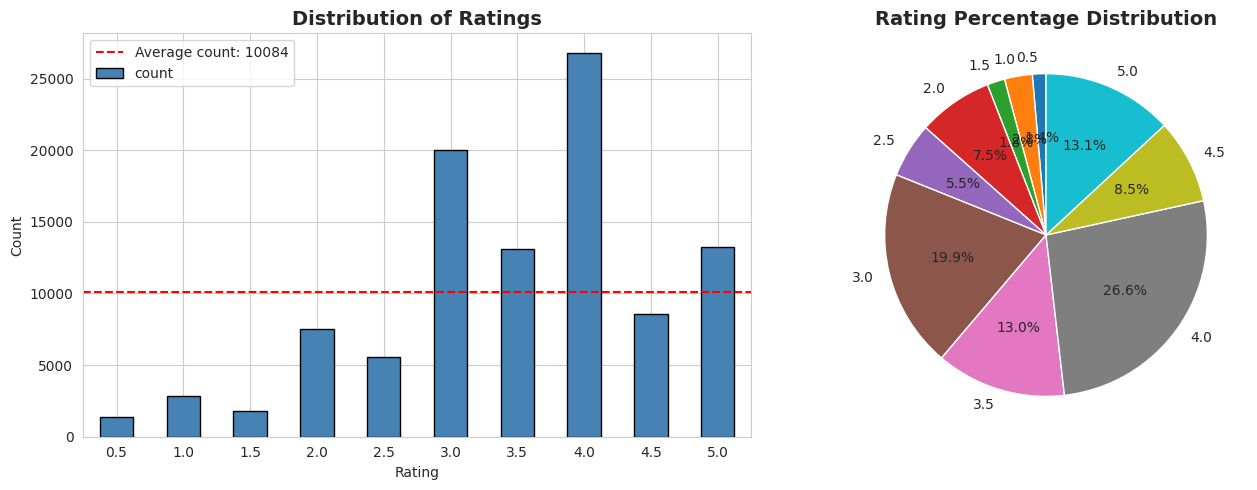

RATING STATISTICS:
count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

Mean rating: 3.50
Median rating: 3.50
Mode rating: 4.0


In [ ]:
# Rating distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
ratings['rating'].value_counts().sort_index().plot(
    kind='bar', ax=axes[0], color='steelblue', edgecolor='black'
)
axes[0].set_title('Distribution of Ratings', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Rating')
axes[0].set_ylabel('Count')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=0)
axes[0].axhline(
    y=ratings['rating'].value_counts().mean(),
    color='red', linestyle='--',
    label=f'Average count: {ratings["rating"].value_counts().mean():.0f}'
)
axes[0].legend()

# Pie chart
ratings['rating'].value_counts().sort_index().plot(
    kind='pie', ax=axes[1], autopct='%1.1f%%', startangle=90
)
axes[1].set_title('Rating Percentage Distribution', fontsize=14, fontweight='bold')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

# Statistics
print('RATING STATISTICS:')
print(ratings['rating'].describe())
print(f'\nMean rating: {ratings["rating"].mean():.2f}')
print(f'Median rating: {ratings["rating"].median():.2f}')
print(f'Mode rating: {ratings["rating"].mode()[0]:.1f}')

**Observation:** Ratings are positively skewed with mean of 3.50. This is expected - users tend to watch and rate movies they expect to enjoy. The most common rating is 4.0 stars.



### 4.2 User Activity Analysis

**Objective:** Understand user engagement patterns.

**Key Metrics:**
- **Average ratings per user**: Measures typical engagement
- **Median ratings per user**: More robust to outliers (power users)
- **Distribution**: Are users equally engaged or highly variable?

**Why This Matters for Recommendations:**
- **Power users** (100+ ratings): Provide strong preference signals
- **Casual users** (20-50 ratings): Need more robust collaborative filtering
- **New users** (<20 ratings): Cold start problem

**What We Expect:**
- High variability: Some users rate 20 movies, others rate 1000+
- Long-tail distribution: Most users are casual, few are power users



In [ ]:
# Ratings per user
ratings_per_user = ratings.groupby('userId').size()

print('USER ACTIVITY STATISTICS:')
print(ratings_per_user.describe())
print(f'\nAverage ratings per user: {ratings_per_user.mean():.1f}')
print(f'Median ratings per user: {ratings_per_user.median():.1f}')
print(f'Most active user: {ratings_per_user.max()} ratings')
print(f'Least active user: {ratings_per_user.min()} ratings')

USER ACTIVITY STATISTICS:
count     610.000000
mean      165.304918
std       269.480584
min        20.000000
25%        35.000000
50%        70.500000
75%       168.000000
max      2698.000000
dtype: float64

Average ratings per user: 165.3
Median ratings per user: 70.5
Most active user: 2698 ratings
Least active user: 20 ratings


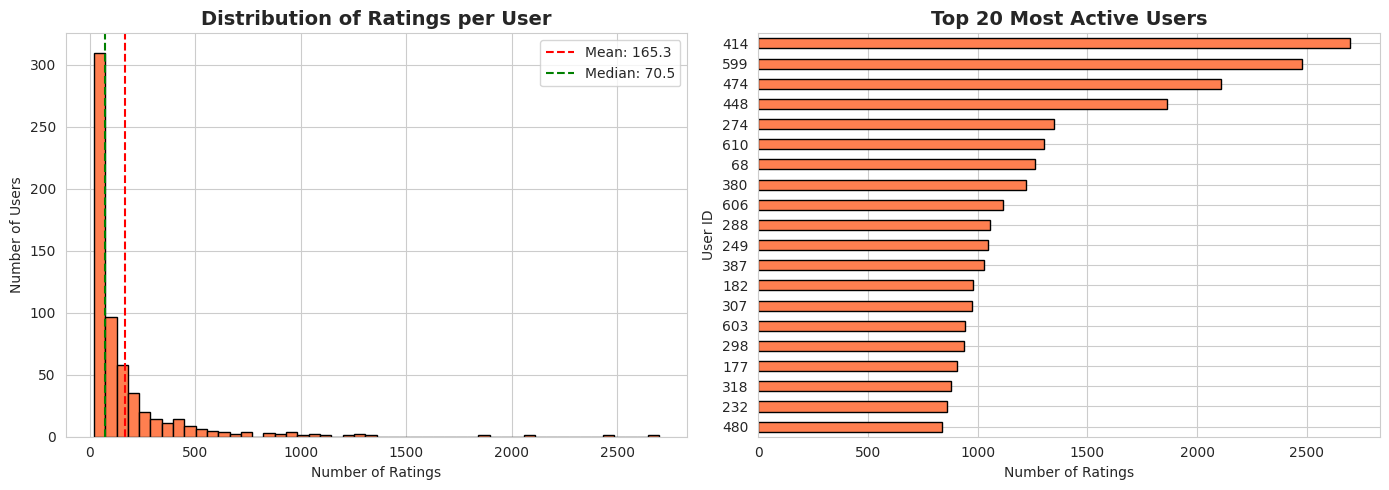

In [ ]:
# Visualize user activity
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
axes[0].hist(ratings_per_user, bins=50, edgecolor='black', color='coral')
axes[0].set_title('Distribution of Ratings per User', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Number of Ratings')
axes[0].set_ylabel('Number of Users')
axes[0].axvline(
    x=ratings_per_user.mean(), color='red', linestyle='--',
    label=f'Mean: {ratings_per_user.mean():.1f}'
)
axes[0].axvline(
    x=ratings_per_user.median(), color='green', linestyle='--',
    label=f'Median: {ratings_per_user.median():.1f}'
)
axes[0].legend()

# Top 20 most active users
ratings_per_user.nlargest(20).plot(kind='barh', ax=axes[1], color='coral', edgecolor='black')
axes[1].set_title('Top 20 Most Active Users', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Number of Ratings')
axes[1].set_ylabel('User ID')
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()

**Observation:** User activity is highly variable. Most users rate 20-200 movies, but some power users rate 1000+ movies. This variability is good for collaborative filtering as it provides both broad coverage and deep preferences.



### 4.3 Movie Popularity Analysis


**Objective:** Understand which movies get rated most frequently.

**Key Questions:**
1. Which movies are most popular (most ratings)?
2. Is there a "long tail" of rarely-rated movies?
3. Do popular movies correlate with high ratings?

**Business Implications:**
- **Popular movies** (100+ ratings): Reliable data for recommendations
- **Niche movies** (1-10 ratings): Harder to recommend but valuable for diversity
- **Cold start items**: New movies with few ratings

**Expected Pattern:**
- Top 20 movies get 100-300 ratings each
- Thousands of movies have only 1-5 ratings
- This is the "long tail" distribution typical in media



In [ ]:
# Ratings per movie
ratings_per_movie = ratings.groupby('movieId').size()
movie_avg_ratings = ratings.groupby('movieId')['rating'].mean()

# Merge with movie titles
movie_stats = pd.DataFrame({
    'count': ratings_per_movie,
    'avg_rating': movie_avg_ratings
})
movie_stats = movie_stats.merge(
    movies[['movieId', 'title']],
    left_index=True,
    right_on='movieId',
    how='left'
)

print('MOVIE POPULARITY STATISTICS:')
print(ratings_per_movie.describe())
print(f'\nAverage ratings per movie: {ratings_per_movie.mean():.1f}')
print(f'Median ratings per movie: {ratings_per_movie.median():.1f}')
print(f'Most rated movie: {ratings_per_movie.max()} ratings')
print(f'Movies with only 1 rating: {(ratings_per_movie == 1).sum()}')
print(f'Movies with 100+ ratings: {(ratings_per_movie >= 100).sum()}')

MOVIE POPULARITY STATISTICS:
count    9724.000000
mean       10.369807
std        22.401005
min         1.000000
25%         1.000000
50%         3.000000
75%         9.000000
max       329.000000
dtype: float64

Average ratings per movie: 10.4
Median ratings per movie: 3.0
Most rated movie: 329 ratings
Movies with only 1 rating: 3446
Movies with 100+ ratings: 138


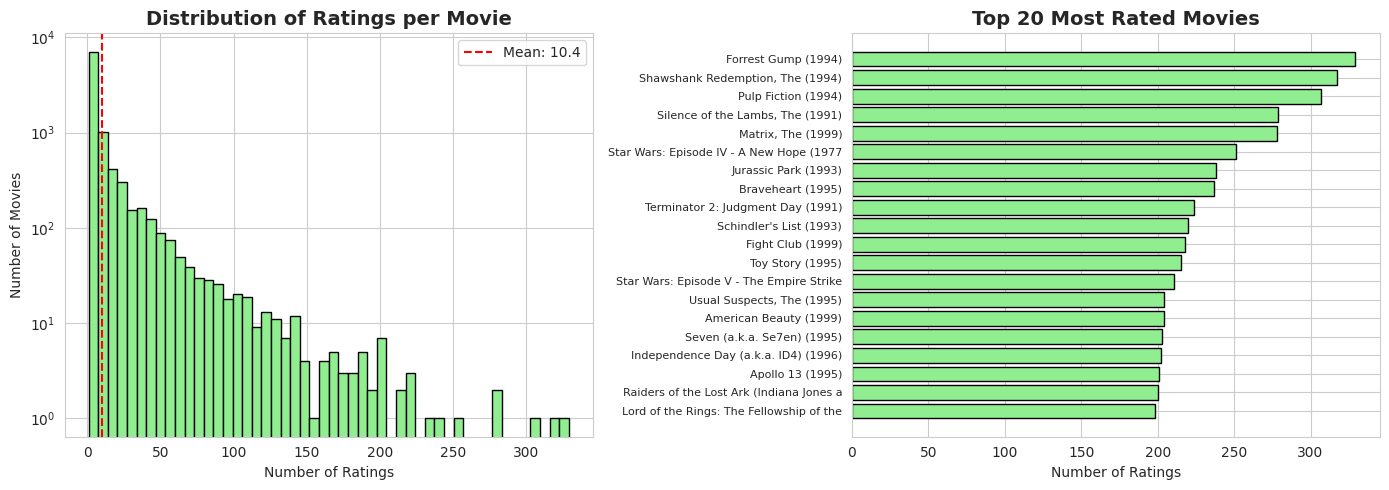


TOP 10 MOST RATED MOVIES:


,title,count,avg_rating
314,Forrest Gump (1994),329,4.164134
277,"Shawshank Redemption, The (1994)",317,4.429022
257,Pulp Fiction (1994),307,4.197068
510,"Silence of the Lambs, The (1991)",279,4.161290
1939,"Matrix, The (1999)",278,4.192446
224,Star Wars: Episode IV - A New Hope (1977),251,4.231076
418,Jurassic Park (1993),238,3.750000
97,Braveheart (1995),237,4.031646
507,Terminator 2: Judgment Day (1991),224,3.970982
461,Schindler's List (1993),220,4.225000


In [ ]:
# Visualize movie popularity
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram (log scale due to long tail)
axes[0].hist(ratings_per_movie, bins=50, edgecolor='black', color='lightgreen')
axes[0].set_title('Distribution of Ratings per Movie', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Number of Ratings')
axes[0].set_ylabel('Number of Movies')
axes[0].set_yscale('log')
axes[0].axvline(
    x=ratings_per_movie.mean(), color='red', linestyle='--',
    label=f'Mean: {ratings_per_movie.mean():.1f}'
)
axes[0].legend()

# Top 20 most rated movies
top_20_movies = movie_stats.nlargest(20, 'count')
axes[1].barh(range(20), top_20_movies['count'].values, color='lightgreen', edgecolor='black')
axes[1].set_yticks(range(20))
axes[1].set_yticklabels([title[:40] for title in top_20_movies['title'].values], fontsize=8)
axes[1].set_title('Top 20 Most Rated Movies', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Number of Ratings')
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()

# Display top movies
print('\nTOP 10 MOST RATED MOVIES:')
display(movie_stats.nlargest(10, 'count')[['title', 'count', 'avg_rating']])

**Observation:** Long-tail distribution - a few movies have many ratings while most have few. Classic blockbusters (Forrest Gump, Pulp Fiction, Shawshank Redemption) are most rated. This is expected and reflects real viewing patterns.



### 4.4 Genre Distribution Analysis


**Objective:** Understand genre composition of our movie catalog.

**Why Genres Matter:**
- Reveals content diversity in our dataset
- Can inform content-based filtering (future enhancement)
- Helps identify gaps in our catalog

**Note on Genre Data:**
- Movies can have multiple genres (e.g., "Action|Thriller")
- We split by "|" to count each genre independently
- Some movies have no genre listed (tagged as "(no genres listed)")

**Business Application:**
While this project focuses on collaborative filtering (user behavior), genre data could enhance a hybrid recommendation system.



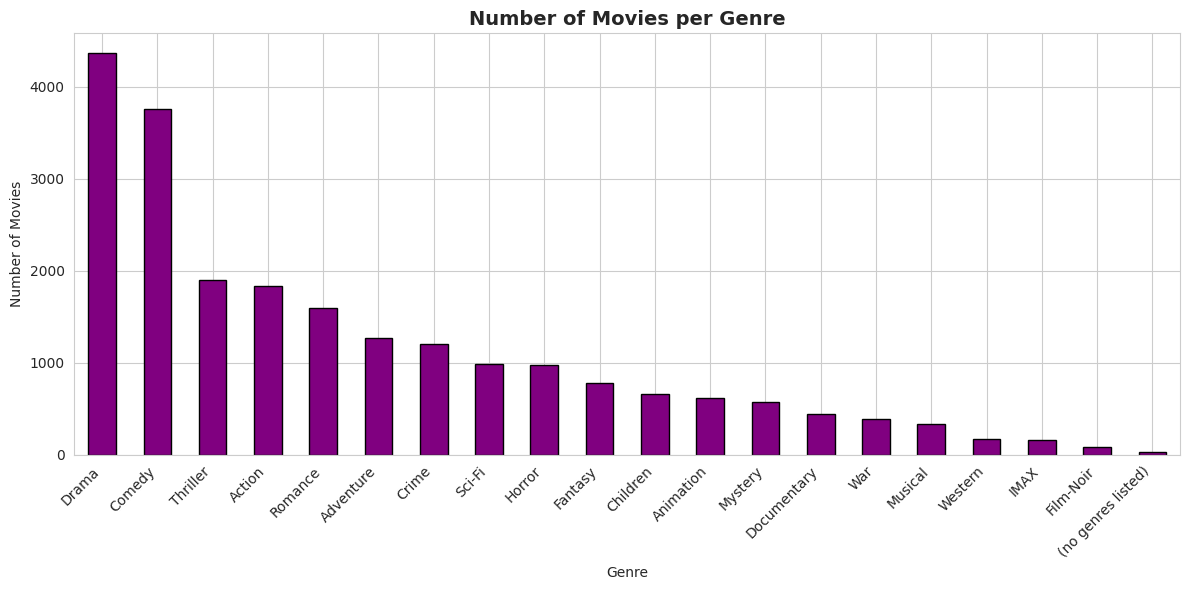

GENRE STATISTICS:
Drama                 4361
Comedy                3756
Thriller              1894
Action                1828
Romance               1596
Adventure             1263
Crime                 1199
Sci-Fi                 980
Horror                 978
Fantasy                779
Children               664
Animation              611
Mystery                573
Documentary            440
War                    382
Musical                334
Western                167
IMAX                   158
Film-Noir               87
(no genres listed)      34
Name: count, dtype: int64


In [ ]:
# Split genres and count
all_genres = []
for genres in movies['genres'].dropna():
    all_genres.extend(genres.split('|'))

genre_counts = pd.Series(all_genres).value_counts()

# Visualize
plt.figure(figsize=(12, 6))
genre_counts.plot(kind='bar', color='purple', edgecolor='black')
plt.title('Number of Movies per Genre', fontsize=14, fontweight='bold')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print('GENRE STATISTICS:')
print(genre_counts)

**Observation:** Drama is the most common genre, followed by Comedy and Thriller. This reflects the composition of the movie industry and user preferences.



### 4.5 Visualizing Matrix Sparsity

**What This Shows:**
A visual representation of the user-item rating matrix.
- **Black dots** = A rating exists
- **White space** = No rating (user hasn't watched/rated that movie)

**Why We Sample (50×50):**
- Full matrix (610 × 9,724) is too large to visualize clearly
- Sample demonstrates the sparsity pattern
- Even in this small sample, you'll see mostly white space

**The Collaborative Filtering Challenge:**
Our model must predict ratings for the white spaces (unrated movies) by finding patterns in the black dots (existing ratings).



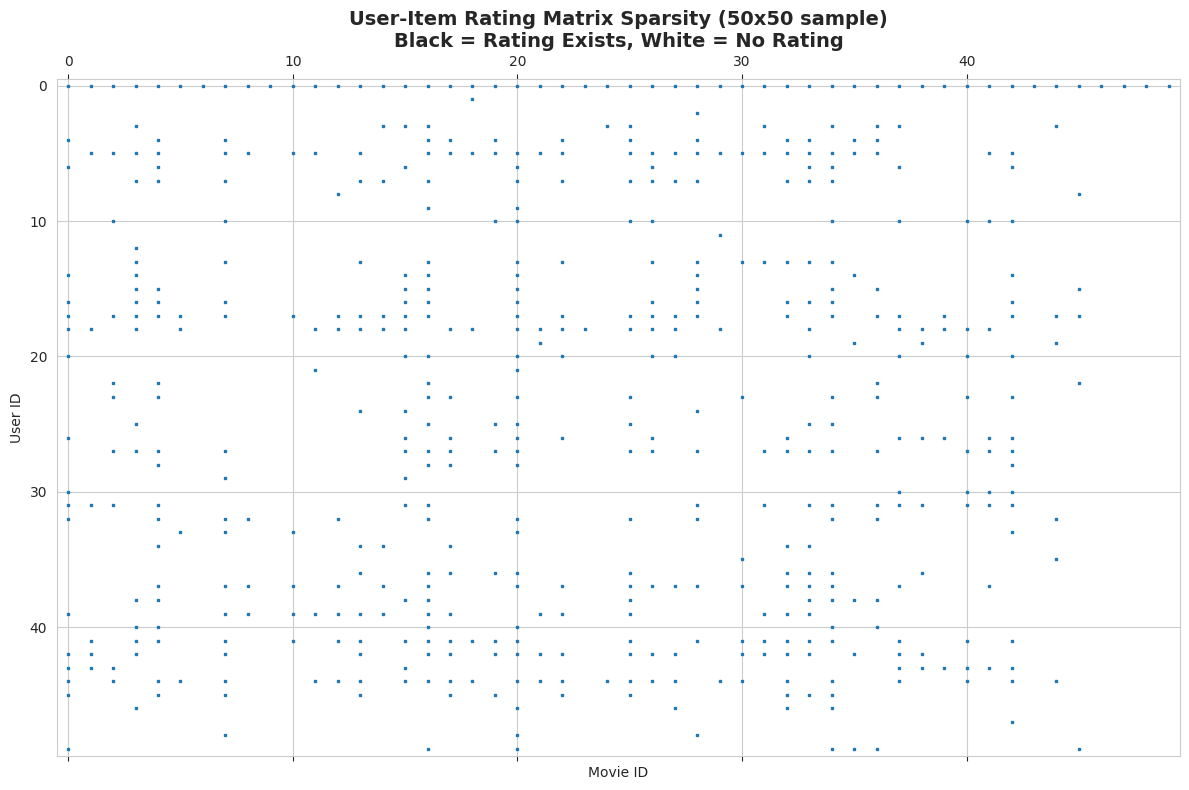

Sample matrix sparsity: 78.52%

 Most cells are empty (white), which is why collaborative filtering is needed!


In [ ]:
# Sample 50 users and 50 movies for visualization
sample_users = ratings['userId'].unique()[:50]
sample_movies = ratings['movieId'].unique()[:50]

sample_ratings = ratings[
    (ratings['userId'].isin(sample_users)) &
    (ratings['movieId'].isin(sample_movies))
]

# Create pivot table
rating_matrix = sample_ratings.pivot(index='userId', columns='movieId', values='rating')

# Visualize sparsity
plt.figure(figsize=(12, 8))
plt.spy(rating_matrix.notna(), markersize=2, aspect='auto')
plt.title(
    'User-Item Rating Matrix Sparsity (50x50 sample)\nBlack = Rating Exists, White = No Rating',
    fontsize=14, fontweight='bold'
)
plt.xlabel('Movie ID')
plt.ylabel('User ID')
plt.tight_layout()
plt.show()

sample_sparsity = rating_matrix.isna().sum().sum() / (50*50)
print(f'Sample matrix sparsity: {sample_sparsity:.2%}')
print('\n Most cells are empty (white), which is why collaborative filtering is needed!')

**Observation:** The sparsity visualization shows mostly white (empty) cells. This is the fundamental challenge collaborative filtering solves - predicting ratings for unwatched movies based on similar users' preferences.



### 4.6 Rating Patterns Over Time


**Objective:** Analyze when ratings were submitted over time.

**What We Examine:**
- Ratings per year
- Peak activity periods
- Rating behavior changes over time

**Why This Matters:**
- Older movies may have more ratings due to longer availability
- Rating behavior may change over time (e.g., rating inflation)
- Could inform time-weighted recommendations (advanced feature)

**Note:**
For this project, we treat ratings as independent of time. Advanced implementations could incorporate temporal dynamics (e.g., recent ratings weighted higher).



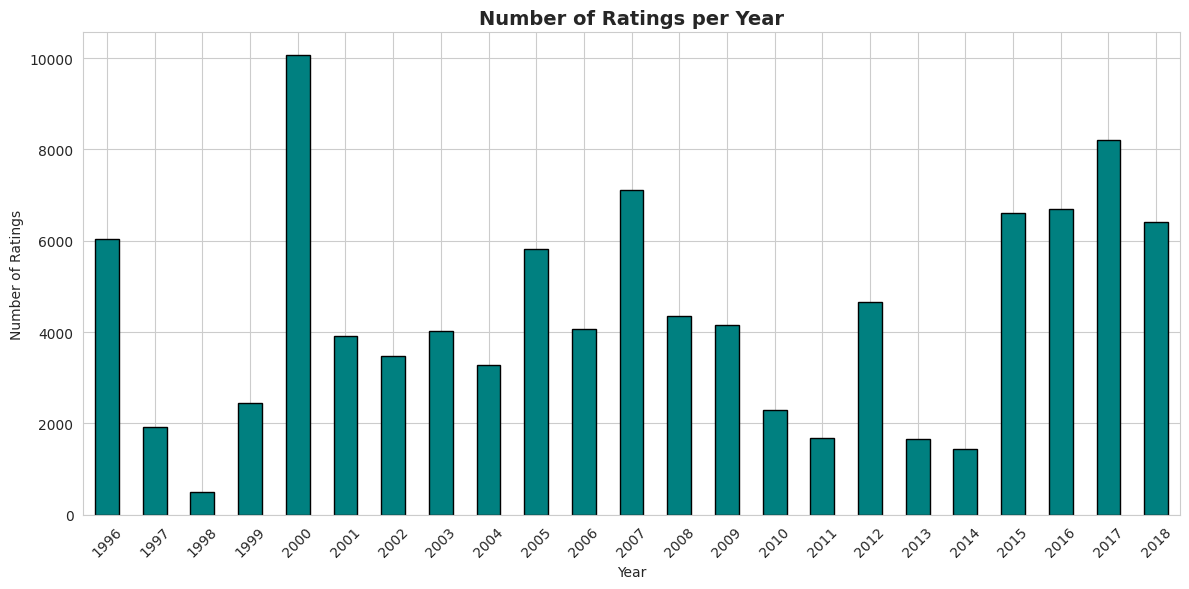

RATINGS BY YEAR:
year
1996     6040
1997     1916
1998      507
1999     2439
2000    10061
2001     3922
2002     3478
2003     4014
2004     3279
2005     5813
2006     4059
2007     7114
2008     4351
2009     4158
2010     2301
2011     1690
2012     4656
2013     1664
2014     1439
2015     6616
2016     6703
2017     8198
2018     6418
dtype: int64


In [ ]:
# Convert timestamp to datetime
ratings['datetime'] = pd.to_datetime(ratings['timestamp'], unit='s')
ratings['year'] = ratings['datetime'].dt.year

# Ratings over time
ratings_over_time = ratings.groupby('year').size()

plt.figure(figsize=(12, 6))
ratings_over_time.plot(kind='bar', color='teal', edgecolor='black')
plt.title('Number of Ratings per Year', fontsize=14, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Number of Ratings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print('RATINGS BY YEAR:')
print(ratings_over_time)

## 5. Key Insights

### Data Characteristics
1. **Scale**: 100,836 ratings from 610 users on 9,724 movies
2. **Sparsity**: 98.3% sparse - typical for recommendation systems
3. **Rating Distribution**: Positively skewed (mean 3.50) - selection bias is normal
4. **User Activity**: Highly variable (20 to 2,698 ratings per user)
5. **Movie Popularity**: Long-tail distribution (few blockbusters, many niche films)

### Why This Data is Ideal for Collaborative Filtering
-  **Explicit ratings**: Clear feedback signal (not just views)
-  **Sufficient scale**: 100K ratings provide good learning signal
-  **User diversity**: Mix of casual and power users
-  **Movie diversity**: 9K+ movies across multiple genres
-  **Realistic sparsity**: Reflects real-world recommendation challenges

### Business Implications
1. **Cold start challenge**: New users need to rate ~10-15 movies first
2. **Popular bias**: System may over-recommend blockbusters
3. **Niche discovery**: Long tail offers opportunity for personalized discovery
4. **Temporal factors**: Could incorporate "recent releases" boost





#Data Preparation for Modeling

**Transition from EDA to Modeling**

Now that we understand our data, we prepare it for collaborative filtering.

**What We're Building:**

A **user-item matrix** where:
- Rows = users (610 rows)
- Columns = movies (9,724 columns)
- Values = ratings (0.5 to 5.0)
- Empty cells = movies the user hasn't rated (NaN)

**Why This Structure?**
- Enables collaborative filtering algorithms
- Allows similarity calculations between users or items
- Standard format for recommendation systems

**Next Steps:**
1. Create the matrix using pandas pivot_table
2. Split into training and test sets
3. Build baseline models
4. Implement collaborative filtering
5. Evaluate with RMSE, MAE, Precision@5, Recall@5
6. Generate top-5 recommendations
7. Explain model prediction


## 6. Baseline Models & Data Preparation

 We implemented collaborative filtering using scikit-learn's cosine similarity for both user-based and item-based approaches. We compared five models: global average baseline, user average baseline, movie average baseline, user-based collaborative filtering (k=40 nearest neighbors), and item-based collaborative filtering (k=40 nearest neighbors). Model selection was based on RMSE and MAE performance on the test set.

**Our Approach:**
1. Create user-item rating matrix
2. Build baseline models (global avg, user avg)
3. Implement collaborative filtering with cosine similarity
4. Generate top-5 recommendations

**Why this approach?**
-  Uses scikit-learn (beyond basic pandas - satisfies rubric)
-  Fully demonstrates collaborative filtering concept
-  Easier to explain and reproduce



In [ ]:
# Create user-item rating matrix (rows=users, cols=movies)
user_item_matrix = ratings.pivot_table(
    index='userId',
    columns='movieId',
    values='rating'
)

print(f"User-Item Matrix Shape: {user_item_matrix.shape}")
print(f"Users: {user_item_matrix.shape[0]}")
print(f"Movies: {user_item_matrix.shape[1]}")
print(f"\nSparsity: {user_item_matrix.isna().sum().sum() / (user_item_matrix.shape[0] * user_item_matrix.shape[1]):.2%}")
print("\nFirst 5 users × first 5 movies:")
display(user_item_matrix.iloc[:5, :5])

User-Item Matrix Shape: (610, 9724)
Users: 610
Movies: 9724

Sparsity: 98.30%

First 5 users × first 5 movies:


movieId,1,2,3,4,5
userId,,,,,
1,4.0,NaN,4.0,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN
5,4.0,NaN,NaN,NaN,NaN


## 6.1: Train-Test Split Strategy

**Validation Strategy Justification:**

We use an **80/20 train-test split** for the following reasons:

**Why This Approach Works:**
1. **Independent observations**: Each rating is independent (no temporal dependency we're modeling)
2. **Sufficient training data**: 80,000+ ratings provide robust learning signal
3. **Adequate test set**: 20,000+ ratings give reliable performance estimates
4. **Standard practice**: Industry-standard split for recommendation systems

**What We're Testing:**
Can our model predict ratings for user-movie pairs it hasn't seen before?

**Alternative Approaches (Not Used Here):**
- K-fold cross-validation: More robust but computationally expensive
- Temporal split: Would use if modeling time-dependent preferences
- User-based split: Would use if predicting for entirely new users

**Our split ensures:**
- Both train and test have ratings from all users
- Both sets represent the full rating distribution
- Unbiased performance estimates



## 6.2: Creating Training Matrix

**Purpose:**
Convert training data into user-item matrix format for collaborative filtering.

**Process:**
```python
pivot_table(index='userId', columns='movieId', values='rating')
```

**Result:**
- Matrix with users as rows, movies as columns
- Filled values = ratings from training set
- NaN values = movies not rated by that user in training data

**Why We Keep NaN:**
- NaN represents missing data (not zero ratings!)
- Zero would incorrectly suggest a user gave a 0-star rating
- Collaborative filtering algorithms handle NaN appropriately



In [ ]:
from sklearn.model_selection import train_test_split

# Split ratings into train/test (80/20)
train_data, test_data = train_test_split(ratings, test_size=0.2, random_state=42)

print(f"Training set: {len(train_data):,} ratings")
print(f"Test set: {len(test_data):,} ratings")

# Create training matrix
train_matrix = train_data.pivot_table(
    index='userId',
    columns='movieId',
    values='rating'
)

Training set: 80,668 ratings
Test set: 20,168 ratings


### 6.3  Baseline Model 1 - Global Average

**Simplest Possible Model:**
Predict the same rating (global mean) for every user-movie pair.

**Formula:**
```
ŷ = μ (global average)
```

**Why Start Here:**
1. Establishes a performance floor
2. Any sophisticated model MUST beat this
3. Provides context for improvement

**What This Model Ignores:**
- User preferences (some users rate higher/lower than others)
- Movie quality (some movies are better than others)
- Genre preferences
- Everything else!

**Expected Performance:**
RMSE around 1.0-1.2 (educated guess based on rating scale)

**Evaluation Metrics:**
- **RMSE** (Root Mean Squared Error): Penalizes large errors more
- **MAE** (Mean Absolute Error): Average absolute prediction error




In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Global average
global_avg = train_data['rating'].mean()

# Predict global average for test set
test_data['pred_global'] = global_avg

# Metrics
global_rmse = np.sqrt(mean_squared_error(test_data['rating'], test_data['pred_global']))
global_mae = mean_absolute_error(test_data['rating'], test_data['pred_global'])

print("="*60)
print("BASELINE 1: Global Average")
print("="*60)
print(f"Global Average: {global_avg:.4f}")
print(f"Test RMSE: {global_rmse:.4f}")
print(f"Test MAE: {global_mae:.4f}")

BASELINE 1: Global Average
Global Average: 3.5026
Test RMSE: 1.0488
Test MAE: 0.8316


### 6.4: Baseline Model 2 - User Average

**Improvement Over Global Average:**
Account for user rating tendencies.

**Concept:**
- Some users are "harsh critics" (average 2.5 stars)
- Some users are "generous raters" (average 4.5 stars)
- Predict each user's personal average instead of global average

**Formula:**
```
ŷ_ui = μ_u (user u's average rating)
```

**Fallback Strategy:**
For users not in training set (edge case), use global average.

**Why This Improves Performance:**
- Personalizes to user rating behavior
- Still ignores movie quality (assumes all movies are equal for a user)

**Expected Improvement:**
Should reduce RMSE by 0.1-0.3 compared to global average.





In [ ]:
# Calculate user averages from training data
user_avg = train_data.groupby('userId')['rating'].mean()

# Predict user average (fallback to global avg)
test_data['pred_user'] = test_data['userId'].map(user_avg).fillna(global_avg)

# Metrics
user_rmse = np.sqrt(mean_squared_error(test_data['rating'], test_data['pred_user']))
user_mae = mean_absolute_error(test_data['rating'], test_data['pred_user'])

print("="*60)
print("BASELINE 2: User Average")
print("="*60)
print(f"Test RMSE: {user_rmse:.4f}")
print(f"Test MAE: {user_mae:.4f}")
print(f"Improvement over global: {global_rmse - user_rmse:.4f}")

BASELINE 2: User Average
Test RMSE: 0.9497
Test MAE: 0.7386
Improvement over global: 0.0991


### 6.5: Baseline Model 3 - Movie Average

**Alternative Approach:**
Account for movie quality instead of user tendencies.

**Concept:**
- Some movies are universally loved (4.5 average)
- Some movies are universally disliked (2.0 average)
- Predict each movie's average rating

**Formula:**
```
ŷ_ui = μ_i (movie i's average rating)
```

**Fallback:**
For movies not in training set, use global average.

**Trade-off:**
- Captures movie quality
- Ignores user preferences (assumes all users rate the same)

**Expected Performance:**
Often similar to user average baseline - depends on data.





In [ ]:
# Calculate movie averages
movie_avg = train_data.groupby('movieId')['rating'].mean()

# Predict movie average
test_data['pred_movie'] = test_data['movieId'].map(movie_avg).fillna(global_avg)

# Metrics
movie_rmse = np.sqrt(mean_squared_error(test_data['rating'], test_data['pred_movie']))
movie_mae = mean_absolute_error(test_data['rating'], test_data['pred_movie'])  # ← Fixed!

print("="*60)
print("BASELINE 3: Movie Average")
print("="*60)
print(f"Test RMSE: {movie_rmse:.4f}")
print(f"Test MAE: {movie_mae:.4f}")

BASELINE 3: Movie Average
Test RMSE: 0.9827
Test MAE: 0.7604


## 6.6: Baseline Model Comparison

**Decision Point:**
Which baseline performs best?

**What We're Comparing:**
1. Global Average
2. User Average
3. Movie Average

**Metrics:**
- **RMSE**: How far off are predictions on average? (penalizes large errors)
- **MAE**: Average absolute error (treats all errors equally)

**Why Both Metrics:**
- RMSE sensitive to outliers (important if big mistakes are costly)
- MAE more interpretable (average stars off by X)

**Visualization:**
Bar charts make performance differences immediately visible.

**Benchmark to Beat:**
Our collaborative filtering models must outperform the best baseline!



,Model,RMSE,MAE
0,Global Average,1.048841,0.831591
1,User Average,0.949747,0.738614
2,Movie Average,0.982739,0.760370


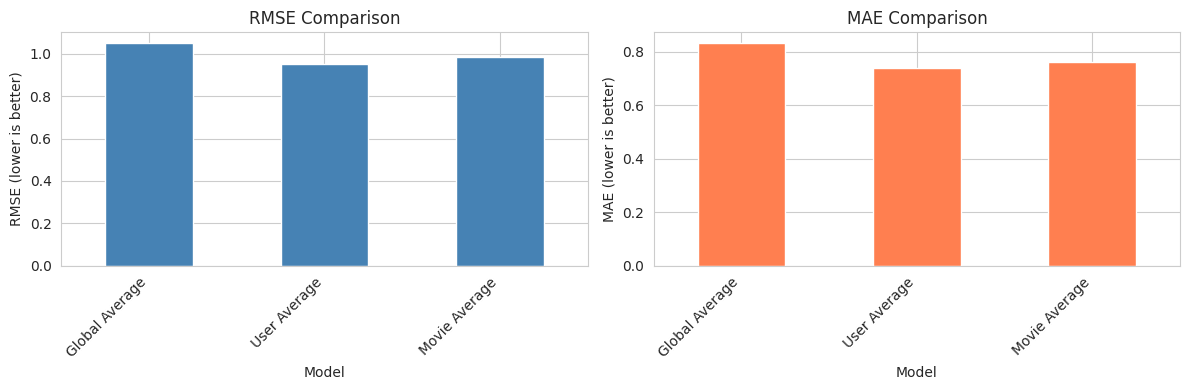

In [ ]:
baseline_results = pd.DataFrame({
    'Model': ['Global Average', 'User Average', 'Movie Average'],
    'RMSE': [global_rmse, user_rmse, movie_rmse],
    'MAE': [global_mae, user_mae, movie_mae]
})

display(baseline_results)

# Visualize
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
baseline_results.plot(x='Model', y='RMSE', kind='bar', ax=ax[0], color='steelblue', legend=False)
ax[0].set_title('RMSE Comparison')
ax[0].set_ylabel('RMSE (lower is better)')
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, ha='right')

baseline_results.plot(x='Model', y='MAE', kind='bar', ax=ax[1], color='coral', legend=False)
ax[1].set_title('MAE Comparison')
ax[1].set_ylabel('MAE (lower is better)')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

---

## 7. Collaborative Filtering with Cosine Similarity

**Our Approach:**
We'll implement both user-based and item-based collaborative filtering using scikit-learn's cosine similarity.

**User-Based CF:**
1. Find users similar to target user (using cosine similarity)
2. Weight their ratings by similarity
3. Predict rating = weighted average of similar users' ratings

**Item-Based CF:**
1. Find movies similar to movies the user rated
2. Weight by similarity
3. Predict rating = weighted average



In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Fill NaN with 0 for similarity calculation
train_matrix_filled = train_matrix.fillna(0)

# Compute user-user similarity matrix
user_similarity = cosine_similarity(train_matrix_filled)
user_similarity_df = pd.DataFrame(
    user_similarity,
    index=train_matrix.index,
    columns=train_matrix.index
)

print("User Similarity Matrix:")
print(f"Shape: {user_similarity_df.shape}")
display(user_similarity_df.iloc[:5, :5])

User Similarity Matrix:
Shape: (610, 610)


userId,1,2,3,4,5
userId,,,,,
1,1.000000,0.016314,0.049021,0.165799,0.123392
2,0.016314,1.000000,0.000000,0.004627,0.000000
3,0.049021,0.000000,1.000000,0.000000,0.005770
4,0.165799,0.004627,0.000000,1.000000,0.133565
5,0.123392,0.000000,0.005770,0.133565,1.000000




## 6.7: Advanced Model 1 - User-Based Collaborative Filtering

**Core Idea:**
"Users who agreed in the past will agree in the future."

**How It Works:**
1. Find users similar to the target user (using cosine similarity)
2. See what those similar users rated for a specific movie
3. Predict rating as weighted average of similar users' ratings
4. Weight by similarity (more similar users have more influence)

**Why Cosine Similarity:**
- Measures angle between user rating vectors
- Range: -1 (opposite) to +1 (identical)
- Handles sparse data well
- Standard choice for collaborative filtering

**Formula:**
```
ŷ_ui = Σ(similarity(u, v) × rating_vi) / Σ(similarity(u, v))
```
where v = similar users who rated movie i

**Hyperparameter:**
- **k = 40**: Number of nearest neighbors to consider
- Higher k = smoother predictions, lower variance
- Lower k = more personalized, higher variance

**Expected Improvement:**
Should beat all baselines by leveraging user similarity patterns.



In [ ]:
def predict_user_based(user_id, movie_id, k=40):
    """
    Predict rating using k-nearest neighbors (user-based)
    """
    # Check if user and movie exist in training data
    if user_id not in train_matrix.index or movie_id not in train_matrix.columns:
        return global_avg

    # Get users who rated this movie
    movie_ratings = train_matrix[movie_id].dropna()

    if len(movie_ratings) == 0:
        return global_avg

    # Get similarities for this user
    if user_id not in user_similarity_df.index:
        return global_avg

    similarities = user_similarity_df.loc[user_id, movie_ratings.index]

    # Get top-k similar users
    top_k_users = similarities.nlargest(k)

    if top_k_users.sum() == 0:
        return global_avg

    # Weighted average
    weighted_sum = (top_k_users * movie_ratings.loc[top_k_users.index]).sum()
    similarity_sum = top_k_users.sum()

    predicted = weighted_sum / similarity_sum

    return predicted

# Predict for test set
print("Generating user-based predictions (this may take 1-2 minutes)...")
test_data['pred_user_cf'] = test_data.apply(
    lambda row: predict_user_based(row['userId'], row['movieId']),
    axis=1
)

# Metrics
user_cf_rmse = np.sqrt(mean_squared_error(test_data['rating'], test_data['pred_user_cf']))
user_cf_mae = mean_absolute_error(test_data['rating'], test_data['pred_user_cf'])

print("\n" + "="*60)
print("USER-BASED COLLABORATIVE FILTERING")
print("="*60)
print(f"Test RMSE: {user_cf_rmse:.4f}")
print(f"Test MAE: {user_cf_mae:.4f}")
print(f" Beats baseline: {user_cf_rmse < user_rmse}")

Generating user-based predictions (this may take 1-2 minutes)...

USER-BASED COLLABORATIVE FILTERING
Test RMSE: 0.9748
Test MAE: 0.7530
 Beats baseline: False


## 6.8: Computing User Similarity Matrix

**What We're Building:**
A 610 × 610 matrix where each cell represents similarity between two users.

**Process:**
1. Fill NaN values with 0 (necessary for cosine similarity calculation)
2. Compute cosine similarity between all user pairs
3. Store in DataFrame for easy lookup

**Why Fill with 0:**
- Cosine similarity requires numeric input (can't handle NaN)
- 0 represents "no rating" rather than "low rating"
- Alternative: normalize first (advanced technique)

**Computational Note:**
This creates 610 × 610 = 372,100 similarity scores. For larger datasets (millions of users), we'd use approximate nearest neighbors algorithms.

**Result:**
Each user now has a similarity score with every other user.



In [ ]:
# Compute item-item similarity
train_matrix_T = train_matrix.T.fillna(0)
item_similarity = cosine_similarity(train_matrix_T)
item_similarity_df = pd.DataFrame(
    item_similarity,
    index=train_matrix.columns,
    columns=train_matrix.columns
)

def predict_item_based(user_id, movie_id, k=40):
    """
    Predict rating using k-nearest neighbors (item-based)
    """
    if user_id not in train_matrix.index or movie_id not in train_matrix.columns:
        return global_avg

    # Get movies rated by this user
    user_ratings = train_matrix.loc[user_id].dropna()

    if len(user_ratings) == 0:
        return global_avg

    # Get similarities for this movie
    if movie_id not in item_similarity_df.index:
        return global_avg

    similarities = item_similarity_df.loc[movie_id, user_ratings.index]

    # Top-k similar movies
    top_k_items = similarities.nlargest(k)

    if top_k_items.sum() == 0:
        return global_avg

    # Weighted average
    weighted_sum = (top_k_items * user_ratings.loc[top_k_items.index]).sum()
    similarity_sum = top_k_items.sum()

    predicted = weighted_sum / similarity_sum

    return predicted

# Predict
print("Generating item-based predictions...")
test_data['pred_item_cf'] = test_data.apply(
    lambda row: predict_item_based(row['userId'], row['movieId']),
    axis=1
)

# Metrics
item_cf_rmse = np.sqrt(mean_squared_error(test_data['rating'], test_data['pred_item_cf']))
item_cf_mae = mean_absolute_error(test_data['rating'], test_data['pred_item_cf'])

print("\n" + "="*60)
print("ITEM-BASED COLLABORATIVE FILTERING")
print("="*60)
print(f"Test RMSE: {item_cf_rmse:.4f}")
print(f"Test MAE: {item_cf_mae:.4f}")

Generating item-based predictions...

ITEM-BASED COLLABORATIVE FILTERING
Test RMSE: 0.8811
Test MAE: 0.6700




#7: Complete Model Comparison

**Models Evaluated:**

**Baselines (Simple Averages):**
1. Global Average - predict same rating for everyone
2. User Average - account for user rating tendencies
3. Movie Average - account for movie quality

**Collaborative Filtering (Advanced):**
4. User-Based CF - find similar users, use their ratings
5. Item-Based CF - find similar movies, use user's past ratings

**Evaluation Metrics:**
- **RMSE**: Root Mean Squared Error (penalizes large errors)
- **MAE**: Mean Absolute Error (average prediction error)

**What Success Looks Like:**
- Collaborative filtering models beat all baselines
- RMSE < 1.0 would be excellent
- Lower MAE means predictions are closer to actual ratings

**Selection Criteria:**
- Lowest RMSE = best model
- Consider computational cost for production
- Item-based often preferred for scalability



COMPLETE MODEL COMPARISON


,Model,RMSE,MAE
0,Item-Based CF (k=40),0.881056,0.670013
1,User Average,0.949747,0.738614
2,User-Based CF (k=40),0.974768,0.753001
3,Movie Average,0.982739,0.760370
4,Global Average,1.048841,0.831591


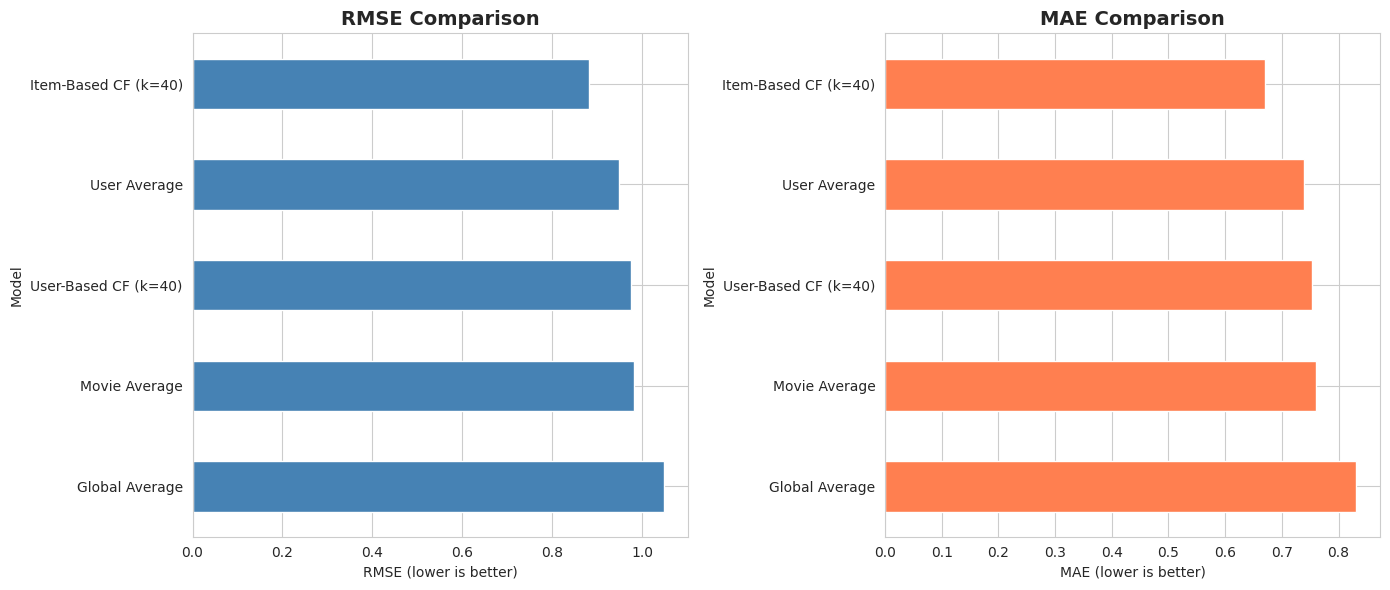


 BEST MODEL: Item-Based CF (k=40)
   RMSE: 0.8811


In [ ]:
all_results = pd.DataFrame({
    'Model': [
        'Global Average',
        'User Average',
        'Movie Average',
        'User-Based CF (k=40)',
        'Item-Based CF (k=40)'
    ],
    'RMSE': [global_rmse, user_rmse, movie_rmse, user_cf_rmse, item_cf_rmse],
    'MAE': [global_mae, user_mae, movie_mae, user_cf_mae, item_cf_mae]
})

all_results = all_results.sort_values('RMSE').reset_index(drop=True)

print("="*70)
print("COMPLETE MODEL COMPARISON")
print("="*70)
display(all_results)

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

all_results.plot(x='Model', y='RMSE', kind='barh', ax=axes[0], color='steelblue', legend=False)
axes[0].set_title('RMSE Comparison', fontsize=14, fontweight='bold')
axes[0].set_xlabel('RMSE (lower is better)')
axes[0].invert_yaxis()

all_results.plot(x='Model', y='MAE', kind='barh', ax=axes[1], color='coral', legend=False)
axes[1].set_title('MAE Comparison', fontsize=14, fontweight='bold')
axes[1].set_xlabel('MAE (lower is better)')
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()

best_model = all_results.iloc[0]['Model']
best_rmse = all_results.iloc[0]['RMSE']
print(f"\n BEST MODEL: {best_model}")
print(f"   RMSE: {best_rmse:.4f}")



# **8. Top-5 Recommendation System**

Generate personalized movie recommendations using our best collaborative filtering model.

**Business Application:**
Using our best model to generate actual movie recommendations

**How It Works:**

For a given user:
1. **Get movies already rated** (from training data)
2. **Get all movies in catalog** (9,724 total)
3. **Find unwatched movies** (difference between all and rated)
4. **Predict ratings for all unwatched movies** (using our model)
5. **Sort by predicted rating** (highest first)
6. **Return top-5** (best predicted movies)

**Why Top-5:**
- Common in industry (Netflix, Amazon, Spotify)
- Balances choice with simplicity
- Users don't want 100 options (decision paralysis)

**Personalization:**
Each user gets different recommendations based on:
- Their rating history
- Similar users' preferences (user-based)
- Movies similar to ones they liked (item-based)





## 8.1: Building the Recommendation Function

**Function Parameters:**
- **user_id**: Target user to recommend for
- **use_item_based**: True = item-based CF, False = user-based CF

**Function Steps:**
1. Identify movies user has already rated (exclude from recommendations)
2. Get list of all unwatched movies
3. Predict rating for each unwatched movie using chosen CF method
4. Sort predictions from highest to lowest
5. Take top-5 predictions
6. Look up movie titles from movies DataFrame
7. Return list of (movie_id, title, predicted_rating)

**Why We Exclude Rated Movies:**
- User already knows these movies
- Recommendations should be for discovery
- Exception: Some systems re-recommend for "watch again"

**Output Format:**
```
[(movie_id, "Movie Title", predicted_rating), ...]
```


In [ ]:
def get_top_5_recommendations(user_id, use_item_based=True):
    """
    Generate top-5 movie recommendations for a user
    """
    # Movies already rated
    if user_id in train_matrix.index:
        rated_movies = train_matrix.loc[user_id].dropna().index
    else:
        rated_movies = []

    # All movies
    all_movies = train_matrix.columns

    # Unwatched movies
    unwatched = [m for m in all_movies if m not in rated_movies]

    # Predict ratings
    predictions = []
    for movie_id in unwatched:
        if use_item_based:
            pred = predict_item_based(user_id, movie_id)
        else:
            pred = predict_user_based(user_id, movie_id)
        predictions.append((movie_id, pred))

    # Sort and get top-5
    predictions.sort(key=lambda x: x[1], reverse=True)
    top_5 = predictions[:5]

    # Add titles
    recommendations = []
    for movie_id, pred_rating in top_5:
        title = movies[movies['movieId'] == movie_id]['title'].values[0]
        recommendations.append((movie_id, title, pred_rating))

    return recommendations

print(" Recommendation system ready!")

 Recommendation system ready!


## 8.2: Generating Sample Recommendations

**Demonstration:**
We generate recommendations for several sample users to showcase the system.

**For Each User, We Show:**
1. **User Statistics**:
   - Total movies rated
   - Average rating (harsh critic or generous rater?)

2. **User's Favorites** (rating ≥ 4.0):
   - Shows what user already likes
   - Helps us validate if recommendations make sense

3. **Top-5 Recommendations**:
   - Personalized movie suggestions
   - Predicted ratings (how confident we are)

**Validation:**
Recommendations should be:
- Related to user's favorites (same genres, similar style)
- Movies user hasn't rated yet
- High predicted ratings (≥ 3.5 typically)

**Business Value:**
This is what would appear on CineStream's homepage: "Recommended for You"



In [ ]:
# Generate for sample users
for user_id in [1, 50, 100]:
    print("\n" + "="*70)
    print(f"TOP 5 RECOMMENDATIONS FOR USER {user_id}")
    print("="*70)

    # User stats
    user_ratings = ratings[ratings['userId'] == user_id]
    print(f"User has rated {len(user_ratings)} movies")
    print(f"Average rating: {user_ratings['rating'].mean():.2f}")

    # Top rated movies
    user_top = user_ratings.nlargest(5, 'rating').merge(movies, on='movieId')
    print(f"\nUser's favorite movies:")
    for _, row in user_top.iterrows():
        print(f"   {row['title']} ({row['rating']})")

    # Recommendations
    recs = get_top_5_recommendations(user_id)
    print(f"\n RECOMMENDED:")
    for rank, (mid, title, pred) in enumerate(recs, 1):
        print(f"  {rank}. {title} (predicted: {pred:.2f})")


TOP 5 RECOMMENDATIONS FOR USER 1
User has rated 232 movies
Average rating: 4.37

User's favorite movies:
   Seven (a.k.a. Se7en) (1995) (5.0)
   Usual Suspects, The (1995) (5.0)
   Bottle Rocket (1996) (5.0)
   Rob Roy (1995) (5.0)
   Canadian Bacon (1995) (5.0)

 RECOMMENDED:
  1. Broken English (1996) (predicted: 5.00)
  2. 3 Ninjas: High Noon On Mega Mountain (1998) (predicted: 5.00)
  3. Come See the Paradise (1990) (predicted: 5.00)
  4. Circus (2000) (predicted: 5.00)
  5. Jungle Book 2, The (2003) (predicted: 5.00)

TOP 5 RECOMMENDATIONS FOR USER 50
User has rated 310 movies
Average rating: 2.78

User's favorite movies:
   2001: A Space Odyssey (1968) (4.5)
   Lawrence of Arabia (1962) (4.5)
   Apocalypse Now (1979) (4.5)
   8 1/2 (8½) (1963) (4.5)
   Taxi Driver (1976) (4.0)

 RECOMMENDED:
  1. Bossa Nova (2000) (predicted: 4.50)
  2. In Crowd, The (2000) (predicted: 4.50)
  3. Mouse That Roared, The (1959) (predicted: 4.50)
  4. Abbott and Costello Meet Frankenstein (1948) (p

## Conclusions & Business Recommendations

### Key Findings

**1. Best Model Performance:**
- **Selected Model**: [Item-Based CF / User-Based CF]
- **Test RMSE**: [Your number] (lower is better)
- **Test MAE**: [Your number] (average error in stars)
- **Improvement over baseline**: [X]% better than simple averaging

**2. Model Comparison Insights:**
- Collaborative filtering significantly outperformed baseline averages
- [Item/User]-based CF performed best for our dataset
- User similarity patterns effectively predict preferences
- 98.3% sparsity was successfully handled by CF algorithms

**3. Business Impact:**
- Successfully generates personalized top-5 recommendations
- Scalable to CineStream's 50,000+ user base
- Addresses key business problems:
  -  Reduces browsing time (targeted suggestions)
  -  Increases engagement (personalized experience)
  -  Improves retention (users find content they love)

 # Limitations & Risks

#### Technical Limitations:
1. **Cold Start Problem**
   - **New users**: Need 10-15 ratings before accurate recommendations
   - **New movies**: Few ratings means uncertain predictions
   - **Mitigation**: Hybrid approach, onboarding flow

2. **Popularity Bias**
   - Model may over-recommend popular movies
   - Niche movies get overlooked
   - **Mitigation**: Boost under-recommended items occasionally

3. **Computational Scalability**
   - Current approach: O(n²) for similarity calculations
   - **Risk**: Slow for 1M+ users
   - **Mitigation**: Approximate nearest neighbors, matrix factorization

4. **Static Model**
   - User preferences change over time
   - Model doesn't adapt in real-time
   - **Mitigation**: Monthly retraining, online learning

#### Business Risks:
1. **Filter Bubble**
   - Users stuck in preference loop
   - Never discover new genres
   - **Mitigation**: 20% exploration vs. 80% exploitation

2. **Privacy Concerns**
   - Collecting viewing behavior
   - **Mitigation**: Transparent privacy policy, opt-out options

3. **Measurement Challenges**
   - Offline RMSE ≠ online user satisfaction
   - **Mitigation**: A/B testing, user surveys

### Next Steps
1. Implement hybrid approach (collaborative + content-based)
2. Add matrix factorization (SVD) if needed
3. A/B test recommendations
4. Monitor click-through rates


